In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Transformed Data Set - Sheet1.csv")
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [6]:
X = data.loc[:,('Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink')]
X = pd.get_dummies(X, prefix=('Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink'), columns=['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink'])
y = data['Gender']
print("Label kelas : ", np.unique(y))

Label kelas :  ['F' 'M']


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[ 0.88531564 -0.34444748 -0.70710678 -0.37139068 -0.25400025 -0.37139068
  -0.25400025 -0.58901509 -0.31622777  1.57279503 -0.49526056 -0.51887452
  -0.4472136   2.51661148 -0.39735971 -0.42257713  2.01913919 -0.9701425
  -0.51887452 -0.34444748]
 [-1.12954065  2.9032002  -0.70710678 -0.37139068 -0.25400025  2.6925824
  -0.25400025 -0.58901509 -0.31622777 -0.63581076 -0.49526056 -0.51887452
  -0.4472136   2.51661148 -0.39735971 -0.42257713 -0.49526056  1.03077641
  -0.51887452 -0.34444748]
 [-1.12954065 -0.34444748  1.41421356 -0.37139068 -0.25400025 -0.37139068
  -0.25400025 -0.58901509 -0.31622777  1.57279503 -0.49526056 -0.51887452
  -0.4472136  -0.39735971 -0.39735971  2.36643191 -0.49526056  1.03077641
  -0.51887452 -0.34444748]
 [-1.12954065 -0.34444748  1.41421356 -0.37139068  3.93700394 -0.37139068
  -0.25400025 -0.58901509 -0.31622777 -0.63581076 -0.49526056 -0.51887452
  -0.4472136  -0.39735971  2.51661148 -0.42257713 -0.49526056 -0.9701425
   1.92724822 -0.34444748]
 [ 0.88

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[-1.12954065  2.9032002  -0.70710678 -0.37139068 -0.25400025 -0.37139068
  -0.25400025  1.69774938 -0.31622777 -0.63581076 -0.49526056  1.92724822
  -0.4472136  -0.39735971 -0.39735971 -0.42257713  2.01913919 -0.9701425
  -0.51887452 -0.34444748]
 [ 0.88531564 -0.34444748 -0.70710678 -0.37139068 -0.25400025 -0.37139068
  -0.25400025 -0.58901509 -0.31622777  1.57279503 -0.49526056 -0.51887452
  -0.4472136  -0.39735971 -0.39735971  2.36643191 -0.49526056  1.03077641
  -0.51887452 -0.34444748]
 [ 0.88531564 -0.34444748 -0.70710678 -0.37139068 -0.25400025 -0.37139068
  -0.25400025 -0.58901509  3.16227766 -0.63581076  2.01913919 -0.51887452
  -0.4472136  -0.39735971 -0.39735971 -0.42257713 -0.49526056  1.03077641
  -0.51887452 -0.34444748]
 [-1.12954065 -0.34444748  1.41421356 -0.37139068 -0.25400025 -0.37139068
  -0.25400025  1.69774938 -0.31622777 -0.63581076 -0.49526056 -0.51887452
  -0.4472136  -0.39735971  2.51661148 -0.42257713 -0.49526056 -0.9701425
   1.92724822 -0.3444

In [9]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=0.1, gamma=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear', random_state=0)

In [10]:
print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Koefisien model :  [[ 2.77447794e-02  5.61534490e-03 -3.28786692e-02  1.06202354e-01
   1.07525318e-17  3.06397308e-01 -2.32773182e-01 -4.26766443e-01
   1.36035665e-01  1.51061059e-01 -4.36489970e-02  1.80448399e-01
  -2.68328157e-01  1.99305633e-01 -4.51640861e-02 -2.59571908e-02
  -2.77489362e-02 -1.62604389e-02  4.68738121e-02 -1.06008534e-16]]
Bias model :  [0.05128066]
Indeks Support Vector :  [ 2  3  4  5  6 11 14 15 16 18 19 20 22 27 30 31 35 36 37 41 42  0  1  7
  8  9 10 12 21 23 25 26 29 33 34 38 39 40 43 44 45]
Support vector :  [[ 0.88531564 -0.34444748 -0.70710678 -0.37139068 -0.25400025 -0.37139068
  -0.25400025 -0.58901509  3.16227766 -0.63581076  2.01913919 -0.51887452
  -0.4472136  -0.39735971 -0.39735971 -0.42257713 -0.49526056  1.03077641
  -0.51887452 -0.34444748]
 [-1.12954065 -0.34444748  1.41421356 -0.37139068 -0.25400025 -0.37139068
  -0.25400025  1.69774938 -0.31622777 -0.63581076 -0.49526056 -0.51887452
  -0.4472136  -0.39735971  2.51661148 -0.42257713 -0.495

In [11]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['M' 'F' 'M' 'F' 'M' 'M' 'M' 'M' 'M' 'M' 'F' 'M' 'M' 'M' 'M' 'M' 'F' 'F'
 'F' 'M']


Akurasi : 65.0 %


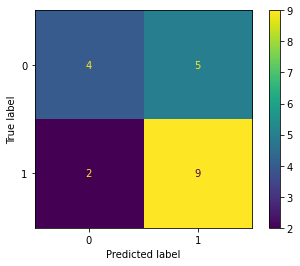

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))